<a href="https://colab.research.google.com/github/bbash/List-of-Hausa-Stop-Word/blob/main/List_of_Hausa_words_implementation_after_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [82]:
# loading the four datasets
bbc_df = pd.read_csv('bbchausa.csv')
voa_df = pd.read_csv('voahausa.csv')
aminiya_df = pd.read_csv('aminiya.csv')
leadership_df = pd.read_csv('hausaleadership.csv')

In [83]:
# print the first 5 entries of one of the dataset
print(bbc_df.head())

        Date                                           Articles
0  1/15/2024  Manajar darakta a IMF, Kristalina Georgieva ta...
1  1/21/2024  Shagon da ke tsakiyar ƙauyen yana samar da kay...
2  1/21/2024  Hakan ya biyo bayan kashe daya daga cikin ‘yan...
3  1/21/2024  Manoma da dama daga jihar Kano, sun ce sun zub...
4  1/21/2024  Fashewar wani abu ya janyo ruɗani a IbadanDa m...


In [84]:
# using the articles columns
bbc_text = bbc_df['Articles']
voa_text = voa_df['Articles']
aminiya_text = aminiya_df['Articles']
leadership_text = leadership_df['Articles']

In [85]:
# Print the length of the each datasets before preprocessing  (number of samples per dataset)
print('BBC: ', len(bbc_text))
print('VOA: ', len(voa_text))
print('AMINIYYA: ', len(aminiya_text))
print('LEADERSHIP: ', len(leadership_text))


BBC:  752
VOA:  544
AMINIYYA:  2081
LEADERSHIP:  1124


In [86]:
# checking for duplicate sentences per dataset
BBC_uniques_article = set(bbc_text)
VOA_uniques_article = set(voa_text)
AMINIYA_uniques_article = set(aminiya_text)
LEADER_uniques_article = set(leadership_text)

print('UNIQUE BBC: ', len(BBC_uniques_article))            # No duplicate instances
print('UNIQUE VOA: ', len(VOA_uniques_article))            # present of duplicates
print('UNIQUE AMINIYYA: ', len(AMINIYA_uniques_article))   # present of duplicate
print('UNIQUE LEADERSHIP: ', len(LEADER_uniques_article))  # present of duplicate

UNIQUE BBC:  752
UNIQUE VOA:  450
UNIQUE AMINIYYA:  1743
UNIQUE LEADERSHIP:  1086


In [87]:
# COUNT NUMBER OF SENTENCES
print('Number of sentence in BBC: ', len(str(BBC_uniques_article).split('.')))
print('Number of sentence in VOA: ',len(str(VOA_uniques_article).split('.')))
print('Number of sentence in AMINIYA: ',len(str(AMINIYA_uniques_article).split('.')))
print('Number of sentence in LEADERSHIP: ',len(str(LEADER_uniques_article).split('.')))

Number of sentence in BBC:  16833
Number of sentence in VOA:  3081
Number of sentence in AMINIYA:  18092
Number of sentence in LEADERSHIP:  9649


In [88]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [89]:
# COUNT NUMBER OF WORDS
BBC_words = [word.lower() for word in word_tokenize(str(BBC_uniques_article)) if word.isalpha()]
VOA_words = [word.lower() for word in word_tokenize(str(VOA_uniques_article)) if word.isalpha()]
AMINIYA_words = [word.lower() for word in word_tokenize(str(AMINIYA_uniques_article)) if word.isalpha()]
LEADERSHIP_words = [word.lower() for word in word_tokenize(str(LEADER_uniques_article)) if word.isalpha()]

In [90]:
print('UNIQUE BBC: ', len(BBC_words))
print('UNIQUE VOA: ', len(VOA_words))
print('UNIQUE AMINIYYA: ', len(AMINIYA_words))
print('UNIQUE LEADERSHIP: ', len(LEADERSHIP_words))

UNIQUE BBC:  400752
UNIQUE VOA:  89985
UNIQUE AMINIYYA:  431737
UNIQUE LEADERSHIP:  280348


In [91]:
# save the processed datasets in a csv file

bbc_word_clean = pd.DataFrame({'Words': BBC_words})
VOA_words_clean = pd.DataFrame({'Words': VOA_words})
AMINIYA_words_clean = pd.DataFrame({'Words': AMINIYA_words})
LEADERSHIP_words_clean = pd.DataFrame({'Words': LEADERSHIP_words})



# Save the DataFrame to a CSV file
bbc_word_clean.to_csv('bbc_word_clean.csv', index=False)
VOA_words_clean.to_csv('VOA_words_clean.csv', index=False)
AMINIYA_words_clean.to_csv('AMINIYA_words_clean.csv', index=False)
LEADERSHIP_words_clean.to_csv('LEADERSHIP_words_clean.csv', index=False)


print("Datasets saved successfully.")

Datasets saved successfully.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word counts for BBCHAUSA:
  Threshold: 0.000001, Word Count: 16576
  Threshold: 0.000010, Word Count: 5039
  Threshold: 0.000100, Word Count: 1093
  Threshold: 0.001000, Word Count: 141
  Threshold: 0.010000, Word Count: 7
  Threshold: 0.100000, Word Count: 0
  Threshold: 1.000000, Word Count: 0


Word counts for VOAHAUSA:
  Threshold: 0.000001, Word Count: 7069
  Threshold: 0.000010, Word Count: 7069
  Threshold: 0.000100, Word Count: 1259
  Threshold: 0.001000, Word Count: 140
  Threshold: 0.010000, Word Count: 5
  Threshold: 0.100000, Word Count: 0
  Threshold: 1.000000, Word Count: 0


Word counts for AMINIYA:
  Threshold: 0.000001, Word Count: 12581
  Threshold: 0.000010, Word Count: 4363
  Threshold: 0.000100, Word Count: 1095
  Threshold: 0.001000, Word Count: 141
  Threshold: 0.010000, Word Count: 8
  Threshold: 0.100000, Word Count: 0
  Threshold: 1.000000, Word Count: 0


Word counts for LEADERSHIPHAUSA:
  Threshold: 0.000001, Word Count: 12592
  Threshold: 0.000010, Word Cou

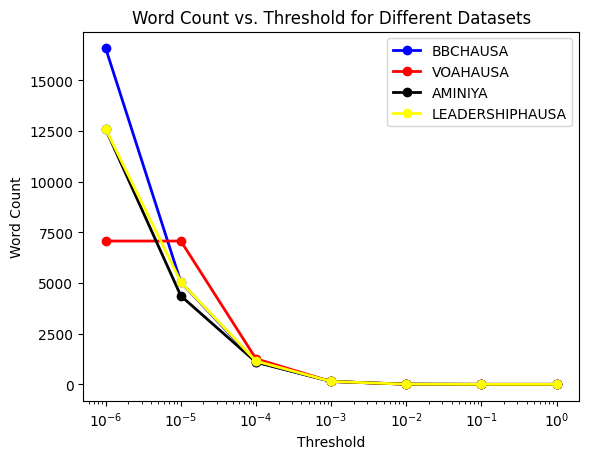

<Figure size 640x480 with 0 Axes>

In [92]:
# load the proces datasets and apply TD-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk
import pickle
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

# Load datasets
bbc = pd.read_csv('bbc_word_clean.csv')
voa = pd.read_csv('VOA_words_clean.csv')
aminiya = pd.read_csv('AMINIYA_words_clean.csv')
leadership = pd.read_csv('LEADERSHIP_words_clean.csv')

bbc_words_at_threshold = []
voa_words_at_threshold = []
aminiya_words_at_threshold = []
leadership_words_at_threshold = []

# Extract text columns
bbc = bbc['Words']
voa = voa['Words']
aminiya = aminiya['Words']
leadership = leadership['Words']


# Define datasets, names, and colors
datasets = [bbc, voa, aminiya, leadership]
dataset_names = ['BBCHAUSA', 'VOAHAUSA', 'AMINIYA', 'LEADERSHIPHAUSA']
colors = ['blue', 'red', 'black', 'yellow']

# Define thresholds
thresholds = [1.0E-06, 1.0E-05, 1.0E-04, 1.0E-03, 1.0E-02, 1.0E-01, 1.0E+00]

# Iterate through datasets
for i, dataset in enumerate(datasets):
    tfidf_vectorizer = TfidfVectorizer()
    word_tfidf_scores = defaultdict(float)
    num_batches = 0

    # Initialize word_counts here, inside the dataset loop
    word_counts = []

    # Process dataset in batches (adjust chunk_size if needed)
    chunk_size = 500
    for chunk_start in range(0, len(dataset), chunk_size):
        chunk_end = min(chunk_start + chunk_size, len(dataset))
        chunk_texts = dataset[chunk_start:chunk_end].dropna(axis=0).tolist()

        num_batches += 1
        tfidf_matrix = tfidf_vectorizer.fit_transform(chunk_texts)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
        word_tfidf_means = tfidf_df.mean(axis=0)
        for word, score in word_tfidf_means.items():
            word_tfidf_scores[word] += score

    # Normalize scores
    for word, score in word_tfidf_scores.items():
        word_tfidf_scores[word] /= num_batches

    # Iterate through thresholds and print word counts
    print(f"Word counts for {dataset_names[i]}:")
    for threshold in thresholds:
        filtered_words = {word: score for word, score in word_tfidf_scores.items() if score >= threshold}
        word_count = len(filtered_words)
        print(f"  Threshold: {threshold:.6f}, Word Count: {word_count}")
        word_counts.append(word_count)  # Append word_count to the list
        if threshold == 0.001:
            if dataset_names[i] == 'BBCHAUSA':
                bbc_words_at_threshold = list(filtered_words.keys())
            elif dataset_names[i] == 'VOAHAUSA':
                voa_words_at_threshold = list(filtered_words.keys())
            elif dataset_names[i] == 'AMINIYA':
                aminiya_words_at_threshold = list(filtered_words.keys())
            elif dataset_names[i] == 'LEADERSHIPHAUSA':
                leadership_words_at_threshold = list(filtered_words.keys())
    print("\n")  # Add a newline for better readability

    # Plot word counts for the current dataset
    plt.plot(thresholds, word_counts, marker='o', label=dataset_names[i], color=colors[i], linewidth=2)  # Increased linewidth for spacing
# Save the lists
with open('BBC_words_0001.pkl', 'wb') as f:
    pickle.dump(bbc_words_at_threshold, f)

with open('voa_words_0001.pkl', 'wb') as f:
    pickle.dump(voa_words_at_threshold, f)

with open('aminiya_words_0001.pkl', 'wb') as f:
    pickle.dump(aminiya_words_at_threshold, f)

with open('leadership_words_0001.pkl', 'wb') as f:
    pickle.dump(leadership_words_at_threshold, f)

# Set plot properties
plt.xscale('log')
plt.xlabel('Threshold')
plt.ylabel('Word Count')
plt.title('Word Count vs. Threshold for Different Datasets')
plt.legend()

plt.show()

plt.savefig('selected_words.png', bbox_inches='tight', pad_inches=0)

In [93]:
with open('BBC_words_0001.pkl', 'rb') as f:
    BBC_words = pickle.load(f)

with open('voa_words_0001.pkl', 'rb') as f:
    voa_words = pickle.load(f)

with open('aminiya_words_0001.pkl', 'rb') as f:
    aminiya_words = pickle.load(f)

with open('leadership_words_0001.pkl', 'rb') as f:
    leadership_words = pickle.load(f)


In [94]:
# find the intersection of the four datasets after applying 0.001 threshold.

BBC_words_set = set(BBC_words)
voa_words_set = set(voa_words)
aminiya_words_set = set(aminiya_words)
leadership_words_set = set(leadership_words)

# Find the intersection
intersection_words = BBC_words_set & voa_words_set & aminiya_words_set & leadership_words_set
print(len(intersection_words))

# Print the intersection
print("Intersection words:", intersection_words)


91
Intersection words: {'idan', 'wanda', 'nuna', 'duk', 'yake', 'baya', 'ke', 'domin', 'za', 'kasar', 'mu', 'samu', 'ana', 'hakan', 'da', 'daga', 'dan', 'sun', 'jihar', 'watan', 'wani', 'masu', 'shi', 'yi', 'ce', 'an', 'ko', 'inda', 'na', 'sai', 'har', 'wajen', 'biyu', 'mutane', 'su', 'mai', 'wa', 'amma', 'tare', 'ji', 'bayyana', 'zuwa', 'ranar', 'ake', 'gaba', 'kan', 'matsayin', 'dai', 'bayan', 'cewa', 'cikin', 'ta', 'bai', 'wasu', 'yanzu', 'shugaban', 'yadda', 'yankin', 'ne', 'in', 'haka', 'ciki', 'ci', 'suna', 'don', 'samun', 'yana', 'iya', 'abin', 'tsaro', 'zai', 'kai', 'saboda', 'lokacin', 'yayin', 'suka', 'ma', 'gwamnati', 'yin', 'sa', 'ga', 'ba', 'ya', 'hukumar', 'gwamnatin', 'wata', 'kamar', 'irin', 'wannan', 'aka', 'kuma'}


In [95]:
import pandas as pd

# Assuming 'intersection_words' is the set of intersection words

# Create a DataFrame with the intersection words
intersection_df = pd.DataFrame({'Words': list(intersection_words)})

# Save the DataFrame to a CSV file
intersection_df.to_csv('intersection_words.csv', index=False)

print("Intersection words saved to 'intersection_words.csv'")

Intersection words saved to 'intersection_words.csv'


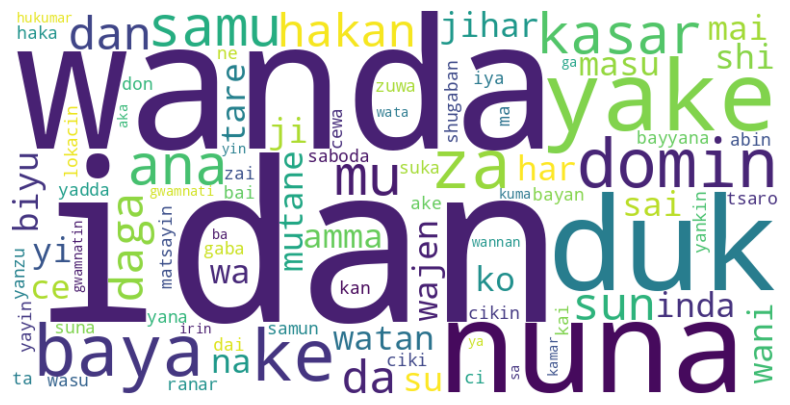

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load the intersection words from the CSV file
intersection_df = pd.read_csv('intersection_words.csv')
intersection_words = intersection_df['Words'].tolist()

# Join the words into a single string
text = ' '.join(intersection_words)

# Create the word cloud with random_state
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [97]:
import pandas as pd
from IPython.display import HTML, display

# Load the data
predicted_df = pd.read_csv('Final_hausa_stop_word_after_manual_Evalaution.csv')

# Extract and sort the words alphabetically
words = sorted(list(predicted_df['Words']))

# Create an HTML table
table_html = "<table>"
for i, word in enumerate(words):
    if i % 5 == 0:  # Start a new row every 5 words
        table_html += "<tr>"
    table_html += f"<td>{word}</td>"
    if i % 5 == 4 or i == len(words) - 1:  # End the row after 5 words or at the last word
        table_html += "</tr>"
table_html += "</table>"

print("Final Hausa Stop after Manual Evaluation")
# Display the HTML table
display(HTML(table_html))

Final Hausa Stop after Manual Evaluation


abin,aka,ake,amma,an
ana,ba,bai,baya,bayan
bayyana,ce,cewa,ciki,cikin
da,daga,dai,dan,domin
don,duk,ga,gaba,haka
hakan,har,idan,in,inda
irin,iya,kai,kamar,kan
ke,ko,kuma,lokacin,ma
mai,masu,mu,na,ne
nuna,sa,saboda,sai,samu
samun,shi,su,suka,sun
